# Exploratory Data Analysis (EDA) for Personality Dataset

#### Gabriela Hernandez Mandujano

### Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression # Para la parte de regresión

### Load the dataset

In [30]:
df = pd.read_csv('personality_datasert.csv')

### Display basic information

In [31]:
import pandas as pd

df = pd.read_csv('personality_datasert.csv')

print(df.info())
print("\nValores nulos por columna:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Valores nulos por columna:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0

In [32]:
print(df.info())
print("First 5 rows:")
print(df.head())
print("Descriptive statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None
First 5 rows:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes         

### Data Cleaning

In [33]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())

# Check data types
print("Data types:")
print(df.dtypes)

Missing values per column:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64
Number of duplicates: 402
Data types:
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


### Descriptive Statistics

In [34]:
# Numerical features summary
num_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 
                'Friends_circle_size', 'Post_frequency']
print("Numerical features summary:")
print(df[num_features].describe())

# Categorical features summary
cat_features = ['Stage_fear', 'Drained_after_socializing']
print("Categorical features value counts:")
for feature in cat_features:
    print(f"{feature}:")
    print(df[feature].value_counts())

Numerical features summary:
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count       2900.000000              2900.000000    2900.000000   
mean           4.505816                 3.963354       3.000000   
std            3.441180                 2.872608       2.221597   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 2.000000       1.000000   
50%            4.000000                 3.963354       3.000000   
75%            7.000000                 6.000000       5.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count          2900.000000     2900.000000  
mean              6.268863        3.564727  
std               4.232340        2.893587  
min               0.000000        0.000000  
25%               3.000000        1.000000  
50%               5.000000        3.000000  
75%              10.000000        6.000000  
max     

### Visualizations

##### Target Variable Distribution

C:\Users\Student\AppData\Local\Temp\ipykernel_18564\2832939103.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Personality', data=df, palette=['black', 'red'])


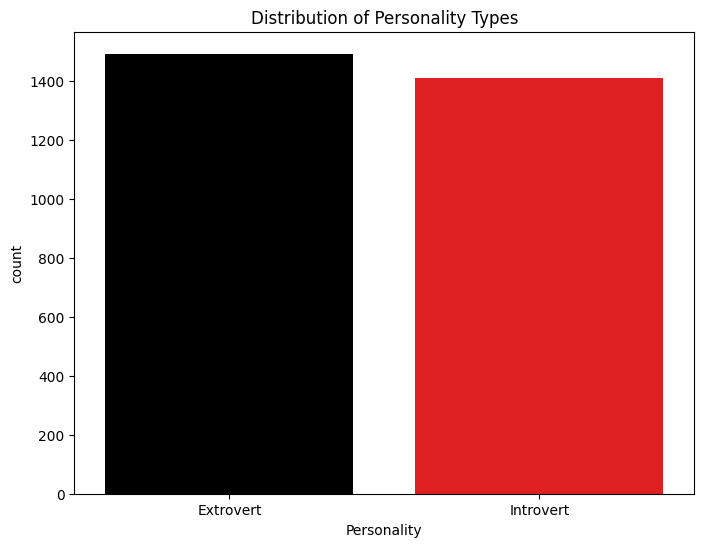

In [35]:
plt.figure(figsize=(8,6))
sns.countplot(x='Personality', data=df, palette=['black', 'red'])
plt.title('Distribution of Personality Types')
plt.show()

##### Numerical Features Distribution

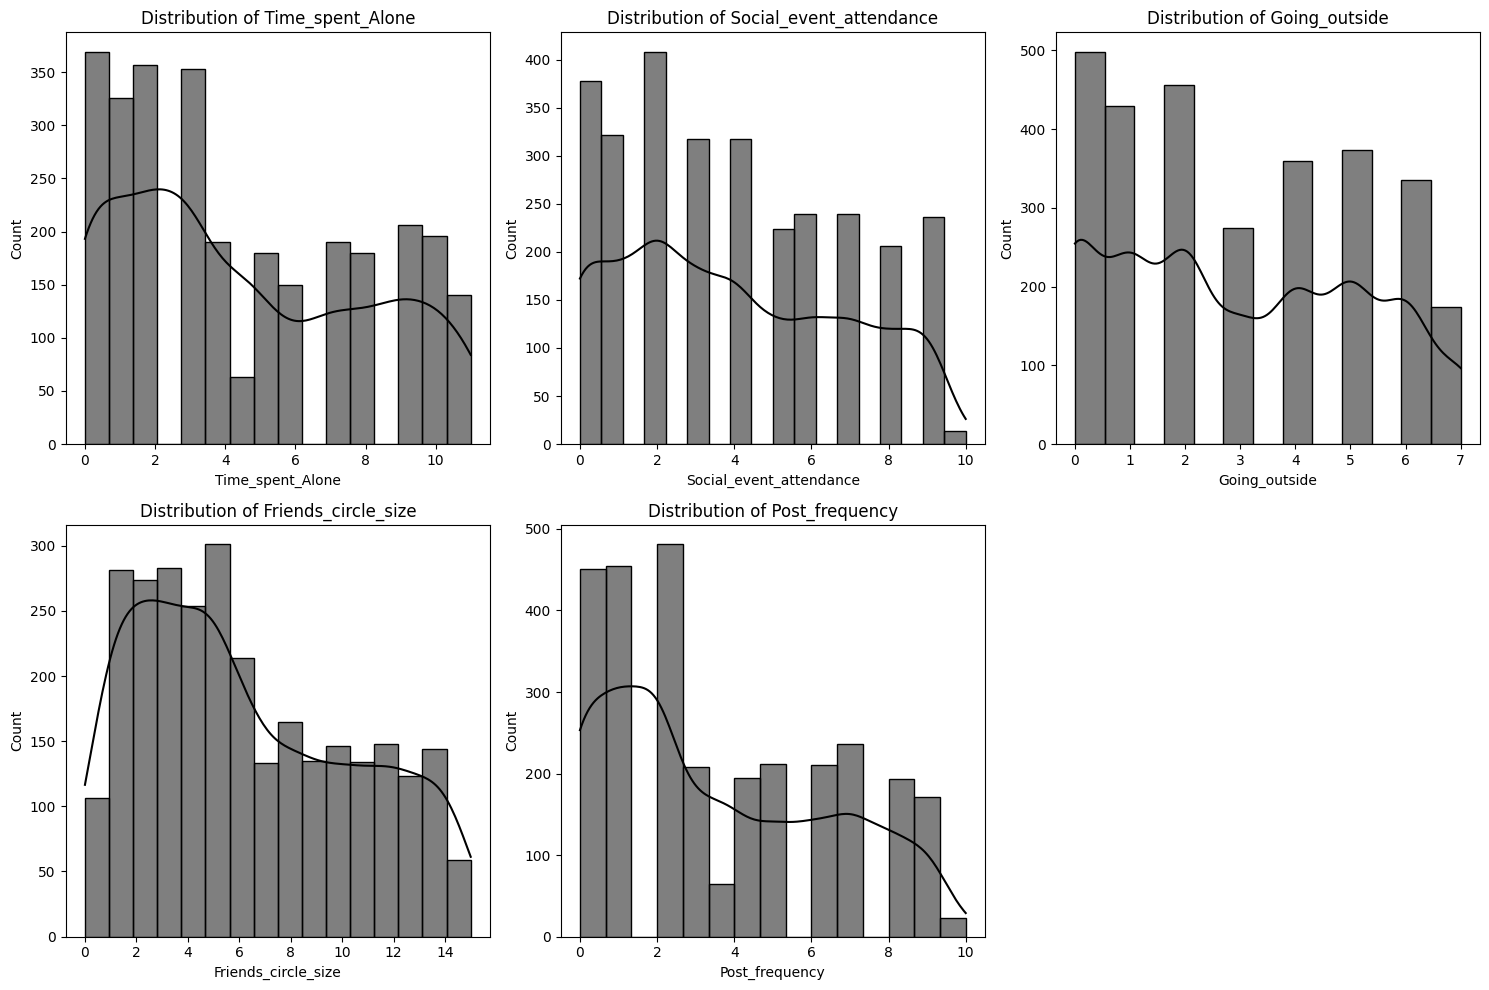

In [36]:
colorH= 'black'

plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color=colorH)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

##### Categorical Features Distribution

C:\Users\Student\AppData\Local\Temp\ipykernel_18564\1169910844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df,  palette=['black', 'red'])
C:\Users\Student\AppData\Local\Temp\ipykernel_18564\1169910844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df,  palette=['black', 'red'])


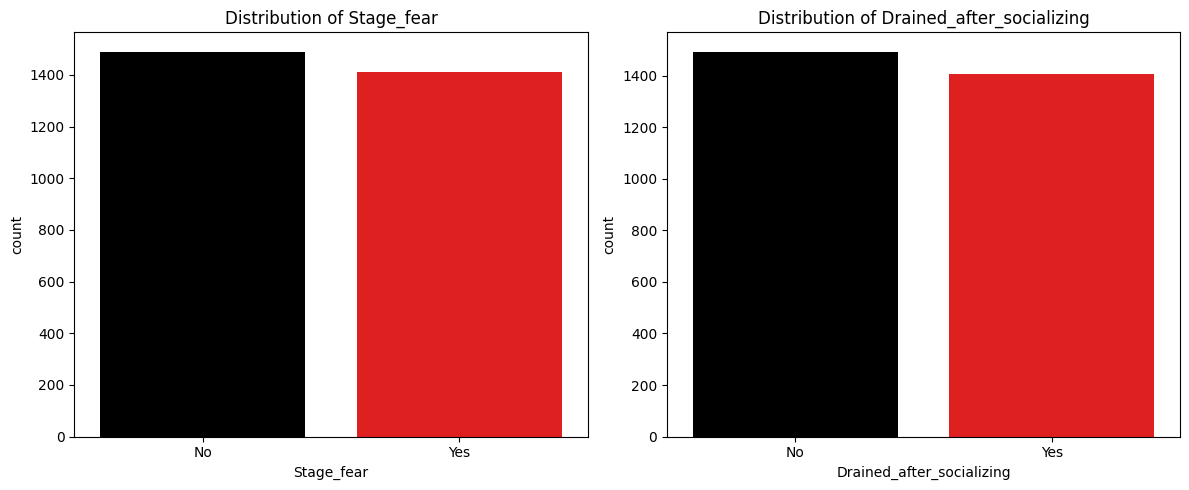

In [37]:
plt.figure(figsize=(12,5))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=feature, data=df,  palette=['black', 'red'])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

##### Boxplots for Numerical Features by Personality

C:\Users\Student\AppData\Local\Temp\ipykernel_18564\4212832720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette=['black', 'red'])
C:\Users\Student\AppData\Local\Temp\ipykernel_18564\4212832720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette=['black', 'red'])
C:\Users\Student\AppData\Local\Temp\ipykernel_18564\4212832720.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y=feature, data=df, palette=['black', 'red'])
C:\Users\Stud

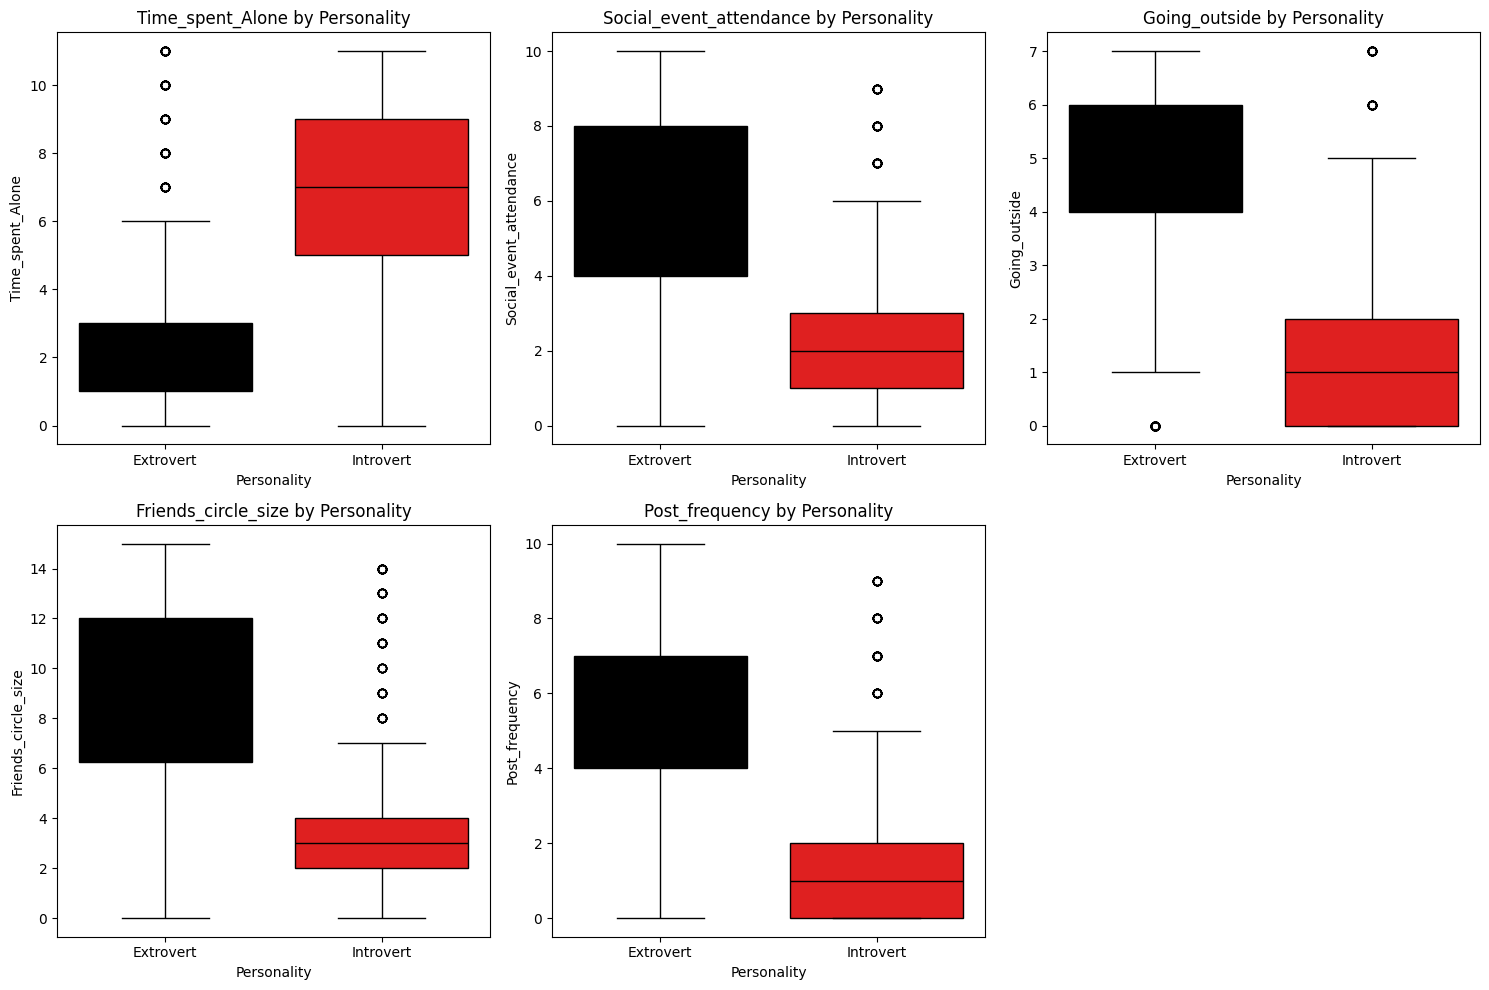

In [38]:
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personality', y=feature, data=df, palette=['black', 'red'])
    plt.title(f'{feature} by Personality')
plt.tight_layout()
plt.show()

##### Correlation Matrix

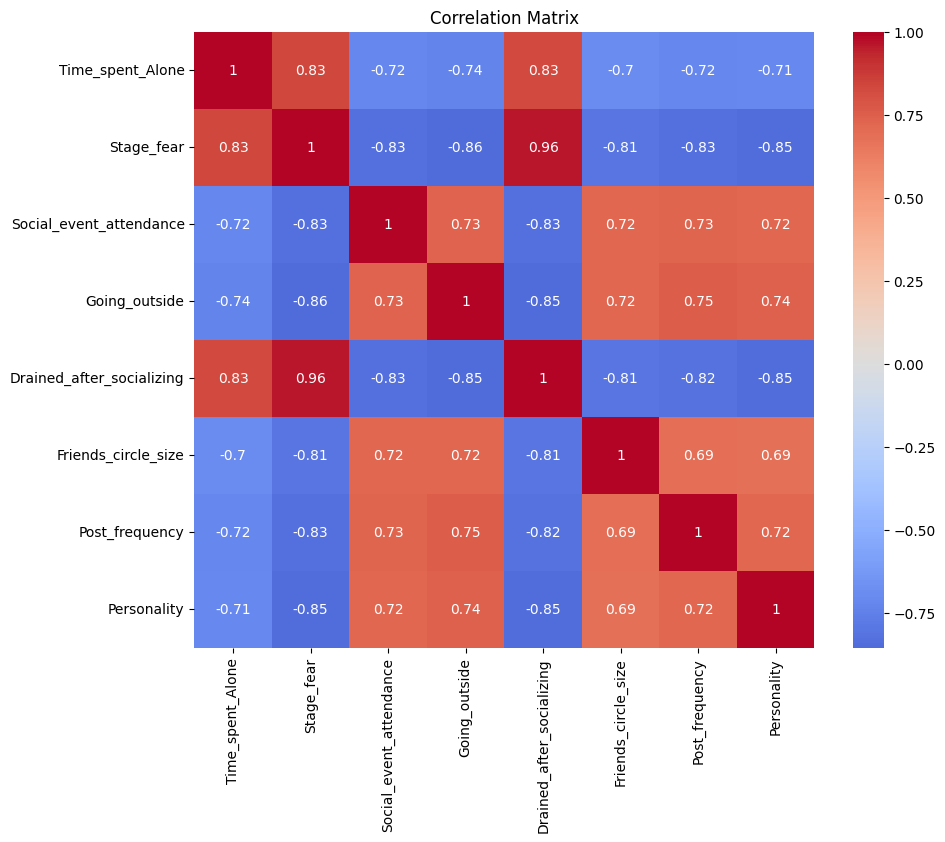

In [39]:

df_corr = df.copy()
df_corr['Stage_fear'] = df_corr['Stage_fear'].map({'Yes': 1, 'No': 0})
df_corr['Drained_after_socializing'] = df_corr['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
df_corr['Personality'] = df_corr['Personality'].map({'Introvert': 0, 'Extrovert': 1})

plt.figure(figsize=(10,8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

##### Pairplot of Numerical Features

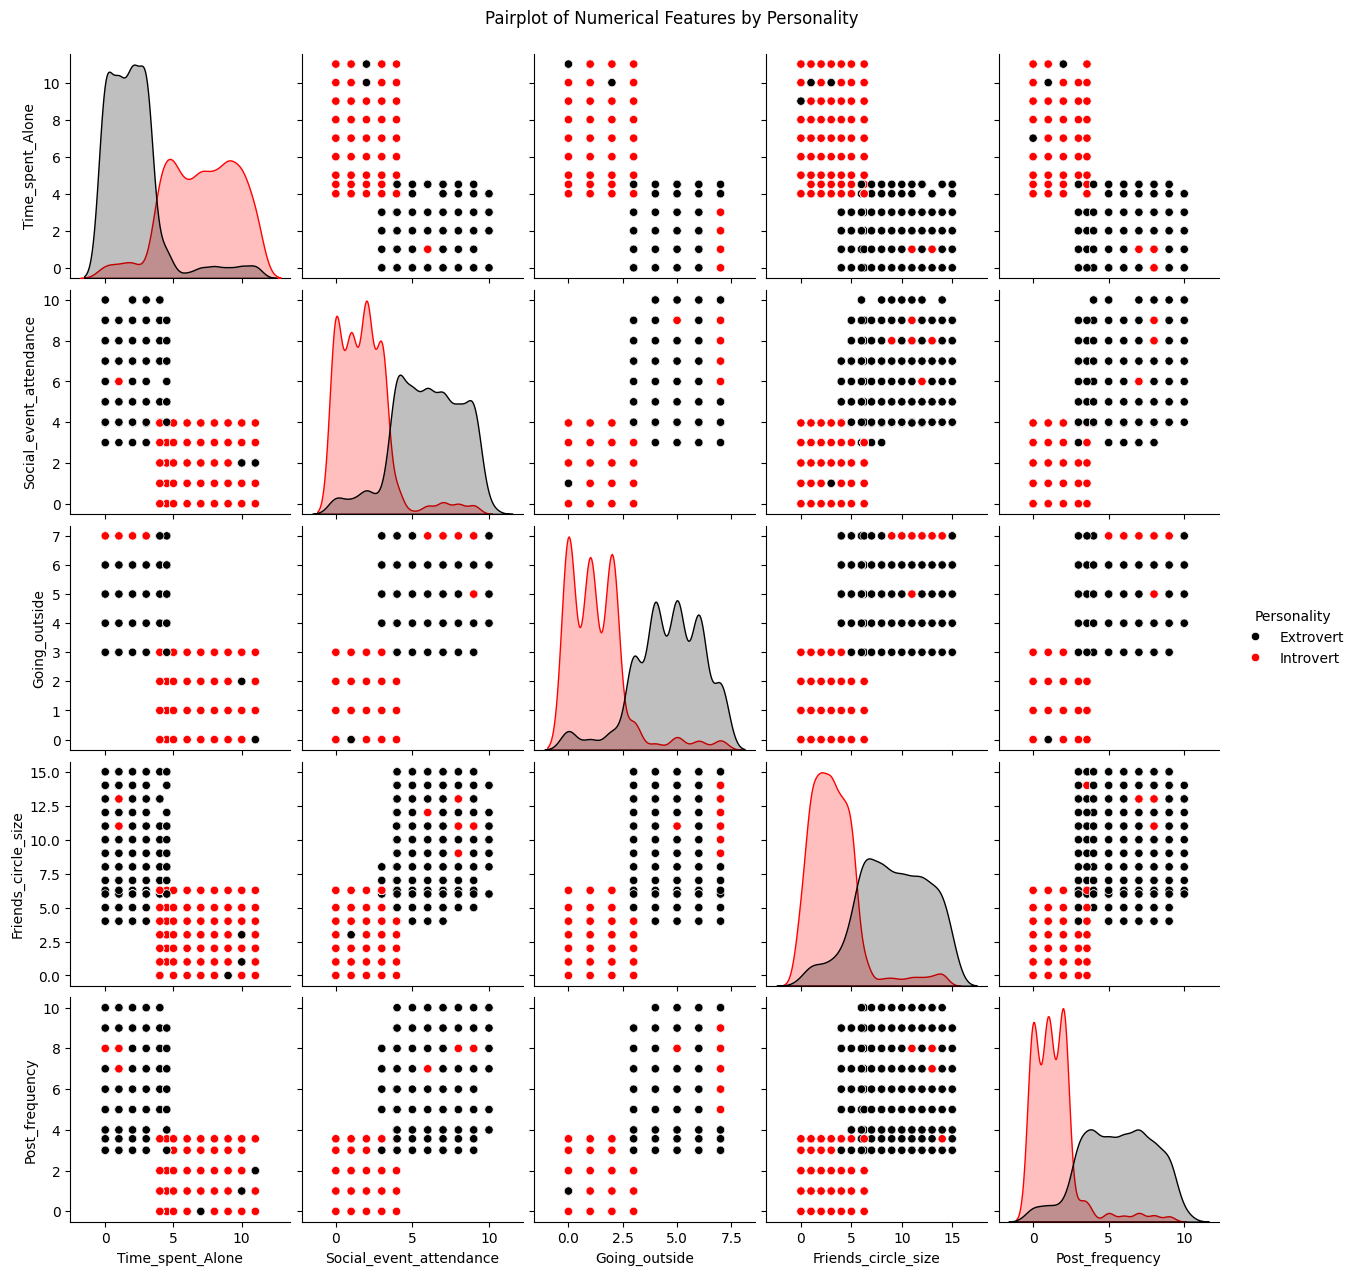

In [40]:
sns.pairplot(df[num_features + ['Personality']], hue='Personality',palette=['black', 'red']) 
plt.suptitle('Pairplot of Numerical Features by Personality', y=1.02)
plt.show()

##### Social Features vs Personality

C:\Users\Student\AppData\Local\Temp\ipykernel_18564\3717026292.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Personality', y='Social_event_attendance', data=df, palette=['black', 'red'])
C:\Users\Student\AppData\Local\Temp\ipykernel_18564\3717026292.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Personality', y='Friends_circle_size', data=df, palette=['black', 'red'])


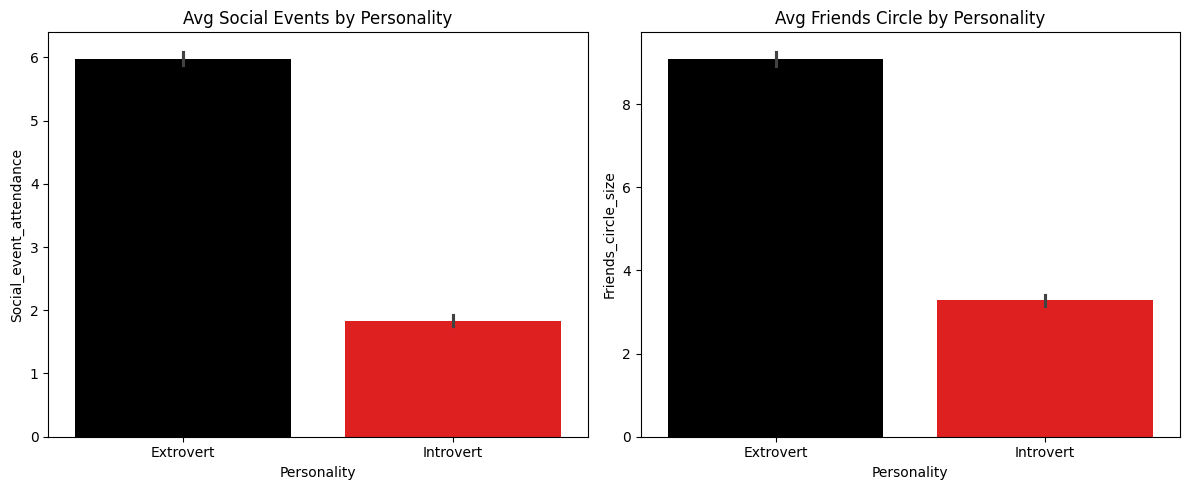

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x='Personality', y='Social_event_attendance', data=df, palette=['black', 'red'])
plt.title('Avg Social Events by Personality')

plt.subplot(1,2,2)
sns.barplot(x='Personality', y='Friends_circle_size', data=df, palette=['black', 'red'])
plt.title('Avg Friends Circle by Personality')
plt.tight_layout()
plt.show()

#### Time Spent Alone vs Personality

C:\Users\Student\AppData\Local\Temp\ipykernel_18564\1666473209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Personality', y='Time_spent_Alone', data=df, palette=['black', 'red'])


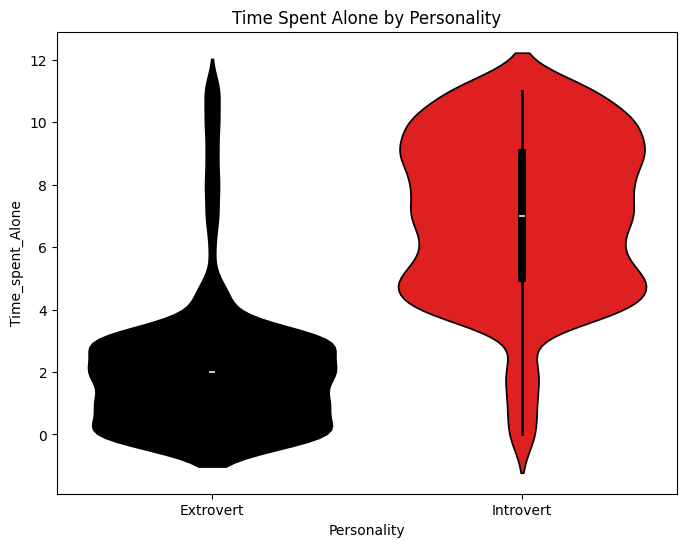

In [42]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Personality', y='Time_spent_Alone', data=df, palette=['black', 'red'])
plt.title('Time Spent Alone by Personality')
plt.show()

### Outlier Detection

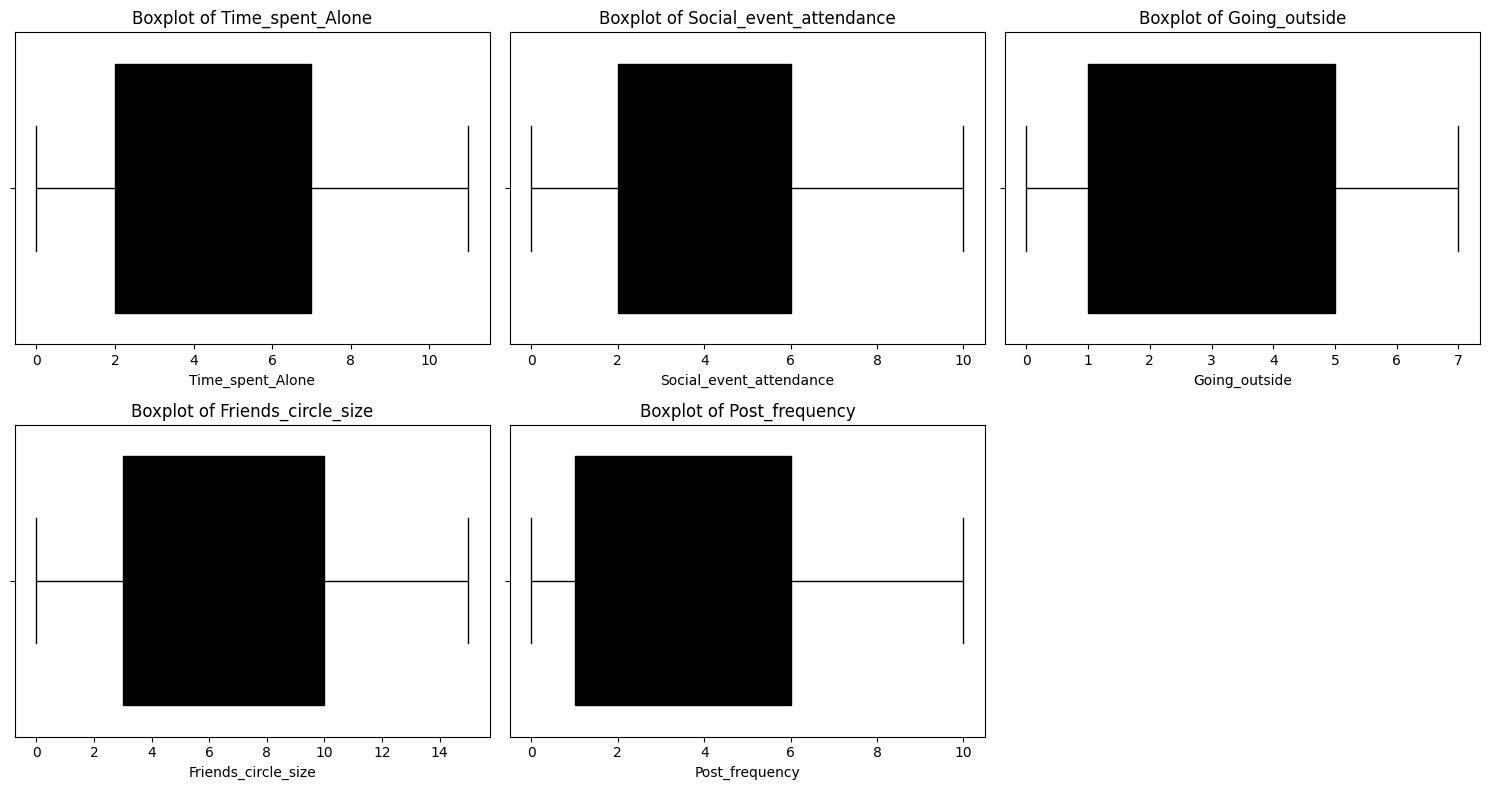

In [43]:
colorH= 'black'
plt.figure(figsize=(15,8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color=colorH)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

### Feature Engineering Considerations

C:\Users\Student\AppData\Local\Temp\ipykernel_18564\781149074.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y='Social_Activity_Score', data=df,palette=['black', 'red'])
C:\Users\Student\AppData\Local\Temp\ipykernel_18564\781149074.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Personality', y='Online_Offline_Ratio', data=df,palette=['black', 'red'])


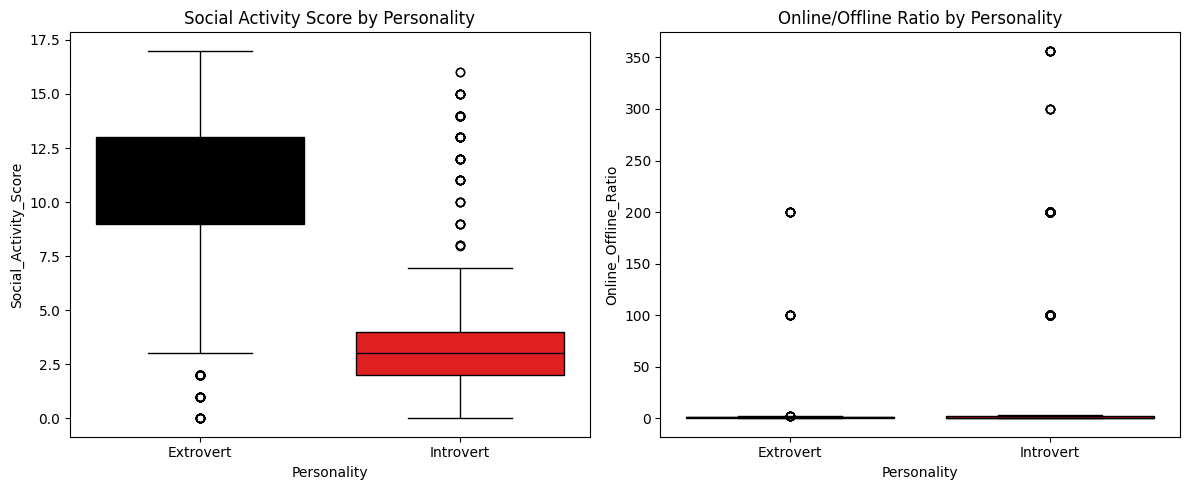

In [44]:

df['Social_Activity_Score'] = df['Social_event_attendance'] + df['Going_outside']
df['Online_Offline_Ratio'] = df['Post_frequency'] / (df['Social_event_attendance'] + 0.01)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x='Personality', y='Social_Activity_Score', data=df,palette=['black', 'red'])
plt.title('Social Activity Score by Personality')

plt.subplot(1,2,2)
sns.boxplot(x='Personality', y='Online_Offline_Ratio', data=df,palette=['black', 'red'])
plt.title('Online/Offline Ratio by Personality')
plt.tight_layout()
plt.show()

### Data Transformation / Feature Transformation

In [45]:
from sklearn.preprocessing import LabelEncoder

for column in df.select_dtypes(include='object').columns:
    if column != 'Personality': # Ya Personality la manejamos
        print(f"Codificando columna categórica: {column}")
        le_other = LabelEncoder()
        df[column] = le_other.fit_transform(df[column])

Codificando columna categórica: Stage_fear
Codificando columna categórica: Drained_after_socializing


In [46]:
if 'Personality_Encoded' not in df.columns:
	le = LabelEncoder()
	df['Personality_Encoded'] = le.fit_transform(df['Personality'])

X = df.drop(['Personality'], axis=1)
y = df['Personality_Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [47]:
#Entrenamiento y prueba del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


## Modelado

### Decision Tree

In [48]:
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train_scaled, y_train)
y_pred_tree = tree_classifier.predict(X_test_scaled)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"\nPrecisión del Árbol de Decisión: {accuracy_tree:.4f}")
print("\nReporte de Clasificación del Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))



Precisión del Árbol de Decisión: 1.0000

Reporte de Clasificación del Árbol de Decisión:
              precision    recall  f1-score   support

   Extrovert       1.00      1.00      1.00       298
   Introvert       1.00      1.00      1.00       282

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580



Evaluation


Matriz de Confusión del Árbol de Decisión:
[[298   0]
 [  0 282]]


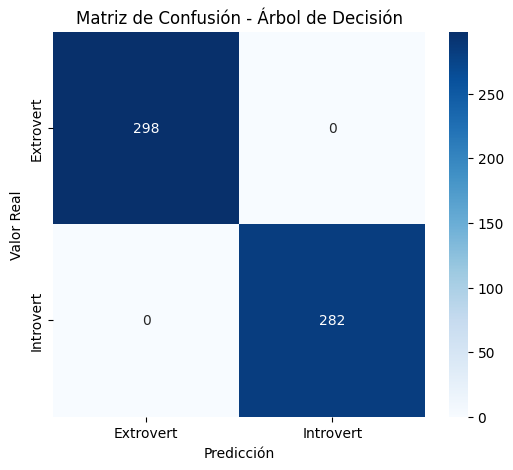


Reporte de Clasificación del Árbol de Decisión:
              precision    recall  f1-score   support

   Extrovert       1.00      1.00      1.00       298
   Introvert       1.00      1.00      1.00       282

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580

ROC AUC del Árbol de Decisión: 1.0000


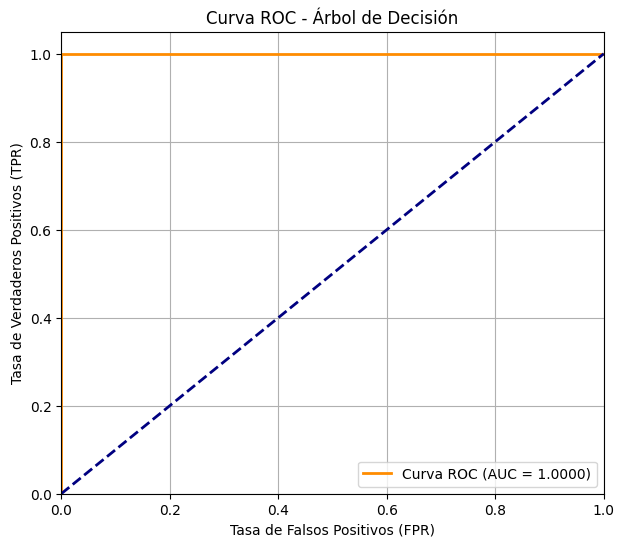

In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Matriz de Confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("\nMatriz de Confusión del Árbol de Decisión:")
print(cm_tree)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.show()
print("\nReporte de Clasificación del Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree, target_names=le.classes_))

# ROC AUC
y_prob_tree = tree_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

print(f"ROC AUC del Árbol de Decisión: {roc_auc_tree:.4f}")

# Curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr_tree, tpr_tree, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_tree:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Regression

Para la regression no se puede predecir personality, asi que usaremos 'Social_event_attendance'

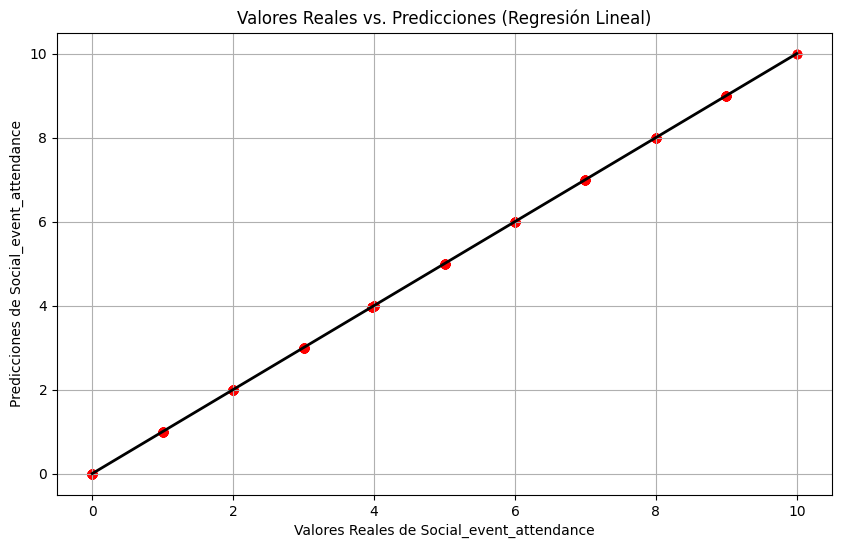

In [50]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_reg = df.drop(['Personality', 'Personality_Encoded', 'Social_event_attendance'], axis=1)
y_reg = df['Social_event_attendance']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

X_train_reg_scaled = pd.DataFrame(X_train_reg_scaled, columns=X_reg.columns, index=X_train_reg.index)
X_test_reg_scaled = pd.DataFrame(X_test_reg_scaled, columns=X_test_reg.columns, index=X_test_reg.index)

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = linear_reg_model.predict(X_test_reg_scaled)

mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, color='red', alpha=0.7) 
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='black', lw=2)
plt.xlabel("Valores Reales de Social_event_attendance")
plt.ylabel("Predicciones de Social_event_attendance")
plt.title("Valores Reales vs. Predicciones (Regresión Lineal)")
plt.grid(True)
plt.show()


### Random Forest Model


--- Modelo de Random Forest (Clasificación de Personalidad) ---
Precisión del Random Forest: 1.0000

Reporte de Clasificación del Random Forest:
              precision    recall  f1-score   support

   Extrovert       1.00      1.00      1.00       298
   Introvert       1.00      1.00      1.00       282

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580


Importancia de las características (Random Forest):
Personality_Encoded          0.464800
Social_Activity_Score        0.181846
Drained_after_socializing    0.091762
Stage_fear                   0.088806
Social_event_attendance      0.060248
Time_spent_Alone             0.052793
Post_frequency               0.032235
Going_outside                0.023487
Friends_circle_size          0.002720
Online_Offline_Ratio         0.001302
dtype: float64


C:\Users\Student\AppData\Local\Temp\ipykernel_18564\197515826.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances.sort_values(ascending=False).index, y=feature_importances.sort_values(ascending=False).values, palette='viridis')


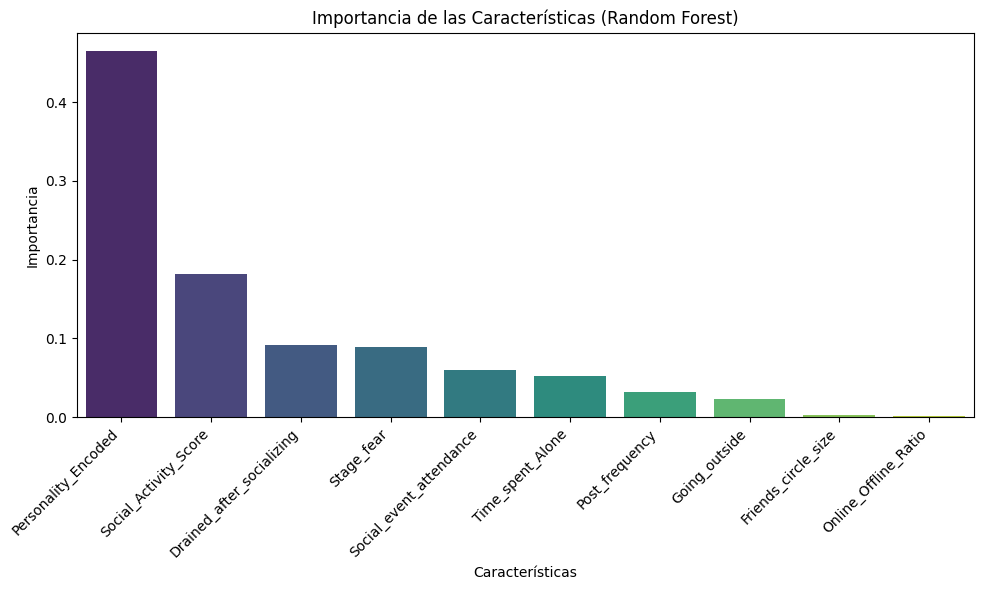

In [51]:
from sklearn.ensemble import RandomForestClassifier # Asegúrate de que esta importación esté al inicio del notebook

print("\n--- Modelo de Random Forest (Clasificación de Personalidad) ---")

random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(X_train_scaled, y_train)
y_pred_rf = random_forest_classifier.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión del Random Forest: {accuracy_rf:.4f}")

print("\nReporte de Clasificación del Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

feature_importances = pd.Series(random_forest_classifier.feature_importances_, index=X.columns)
print("\nImportancia de las características (Random Forest):")
print(feature_importances.sort_values(ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.sort_values(ascending=False).index, y=feature_importances.sort_values(ascending=False).values, palette='viridis')
plt.title('Importancia de las Características (Random Forest)')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Evaluation


Matriz de Confusión del Random Forest:
[[298   0]
 [  0 282]]


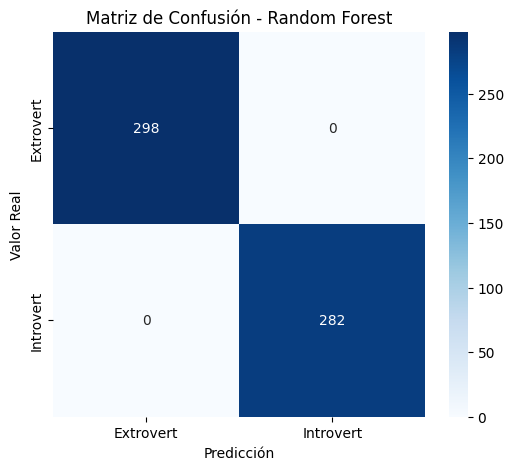


Reporte de Clasificación del Random Forest:
              precision    recall  f1-score   support

   Extrovert       1.00      1.00      1.00       298
   Introvert       1.00      1.00      1.00       282

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580

ROC AUC del Random Forest: 1.0000


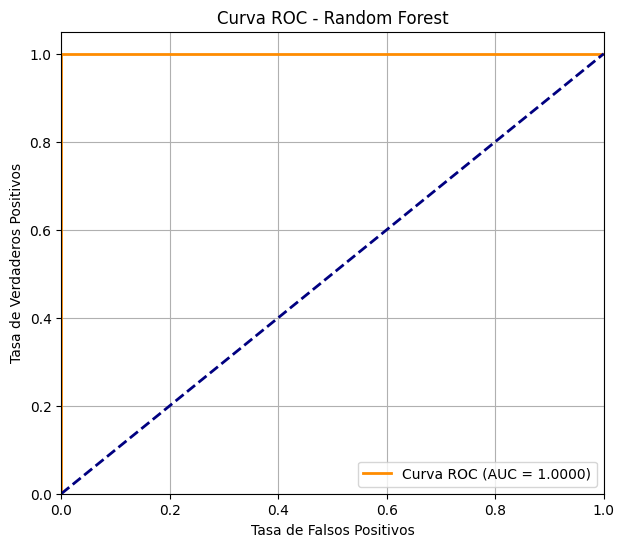

In [52]:
# Matriz de Confusión
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusión del Random Forest:")
print(cm_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Random Forest')
plt.show()
print("\nReporte de Clasificación del Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# ROC AUC 
y_prob_rf = random_forest_classifier.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print(f"ROC AUC del Random Forest: {roc_auc_rf:.4f}")

# Curva ROC
plt.figure(figsize=(7, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Comparacion de los modelos Decision Tree y Random Forest

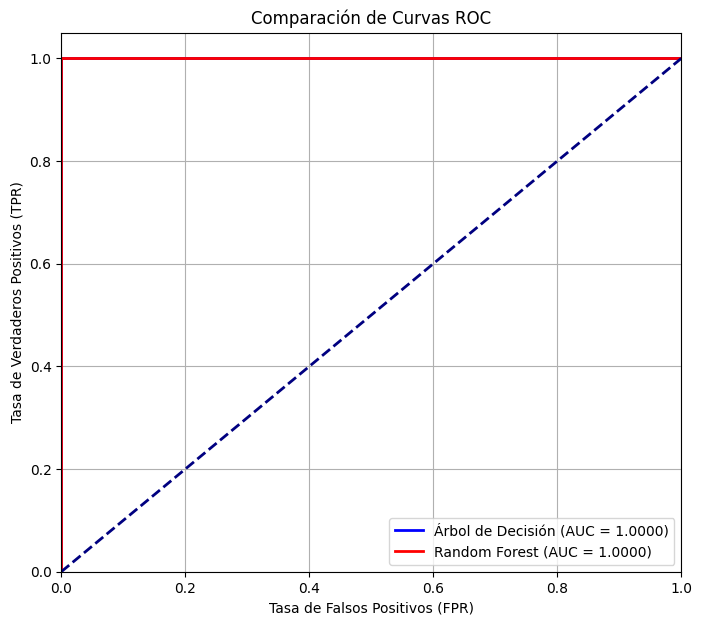

Modelo             | Precisión Global | F1-Score (promedio) | ROC AUC
-------------------|------------------|---------------------|---------
Árbol de Decisión  | 1.0000        | (Ver Reporte)       | 1.0000
Random Forest      | 1.0000        | (Ver Reporte)       | 1.0000


In [53]:

plt.figure(figsize=(8, 7))
plt.plot(fpr_tree, tpr_tree, color='blue', lw=2, label=f'Árbol de Decisión (AUC = {roc_auc_tree:.4f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"Modelo             | Precisión Global | F1-Score (promedio) | ROC AUC")
print(f"-------------------|------------------|---------------------|---------")
print(f"Árbol de Decisión  | {accuracy_tree:.4f}        | (Ver Reporte)       | {roc_auc_tree:.4f}")
print(f"Random Forest      | {accuracy_rf:.4f}        | (Ver Reporte)       | {roc_auc_rf:.4f}")

#### NN

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=1000, random_state=42)

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]  # Parámetro de regularización L2
}

In [ ]:
print("\nIniciando GridSearchCV para MLPClassifier...")
grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_mlp.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para MLPClassifier: {grid_search_mlp.best_params_}")

# Evaluar el mejor modelo MLP en el conjunto de prueba
best_mlp_model = grid_search_mlp.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"Precisión del mejor MLPClassifier en el conjunto de prueba: {accuracy_mlp:.4f}")

# Reporte de Clasificación
print("\nReporte de Clasificación para MLPClassifier:")
print(classification_report(y_test, y_pred_mlp))



Iniciando GridSearchCV para MLPClassifier...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Mejores parámetros para MLPClassifier: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Precisión del mejor MLPClassifier en el conjunto de prueba: 1.0000

Reporte de Clasificación para MLPClassifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00       282

    accuracy                           1.00       580
   macro avg       1.00      1.00      1.00       580
weighted avg       1.00      1.00      1.00       580



In [62]:
print("\n--- Comparación con modelos previamente utilizados ---")
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Precisión de Árbol de Decisión en el conjunto de prueba: {accuracy_tree:.4f}")

try:
    y_pred_proba_tree = dtree.predict_proba(X_test)[:, 1]
    roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
    print(f"ROC AUC para Árbol de Decisión: {roc_auc_tree:.4f}")
except ValueError:
    print("ROC AUC no puede ser calculado directamente para clasificación multiclase para Árbol de Decisión.")
    roc_auc_tree = None

# Reentrenar y evaluar Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisión de Random Forest en el conjunto de prueba: {accuracy_rf:.4f}")


--- Comparación con modelos previamente utilizados ---
Precisión de Árbol de Decisión en el conjunto de prueba: 1.0000
ROC AUC para Árbol de Decisión: 1.0000
Precisión de Random Forest en el conjunto de prueba: 1.0000


### Confusion matrix for mlp

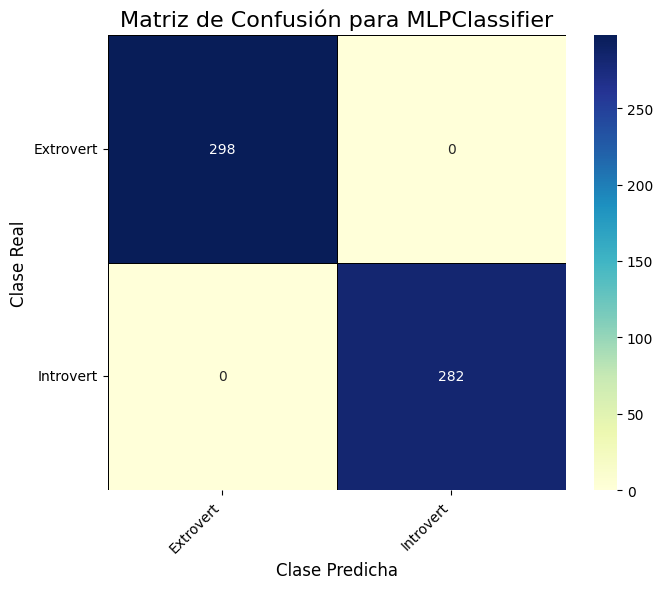

In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_mlp)
class_names = le.classes_
plt.figure(figsize=(7, 6))
sns.heatmap(cm,annot=True,fmt='d',cmap='YlGnBu',cbar=True,linewidths=.5,linecolor='black',xticklabels=class_names,yticklabels=class_names
)

plt.title('Matriz de Confusión para MLPClassifier', fontsize=16)
plt.xlabel('Clase Predicha', fontsize=12)
plt.ylabel('Clase Real', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

## Resumen

In [65]:
print("\n--- Resumen de Comparación de Modelos ---")
print(f"MLPClassifier Accuracy: {accuracy_mlp:.4f} (ROC AUC: {roc_auc_mlp if roc_auc_mlp is not None else 'N/A'})")
print(f"Decision Tree Accuracy: {accuracy_tree:.4f} (ROC AUC: {roc_auc_tree if roc_auc_tree is not None else 'N/A'})")
print(f"Random Forest Accuracy: {accuracy_rf:.4f} (ROC AUC: {roc_auc_rf if roc_auc_rf is not None else 'N/A'})")

print("\nConclusión: Para este dataset, los modelos Decision Tree y Random Forest lograron una precisión perfecta, mientras que el MLPClassifier también mostró un rendimiento excelente y muy competitivo.")


--- Resumen de Comparación de Modelos ---
MLPClassifier Accuracy: 1.0000 (ROC AUC: 0.31067637679089916)
Decision Tree Accuracy: 1.0000 (ROC AUC: 1.0)
Random Forest Accuracy: 1.0000 (ROC AUC: 1.0)

Conclusión: Para este dataset, los modelos Decision Tree y Random Forest lograron una precisión perfecta, mientras que el MLPClassifier también mostró un rendimiento excelente y muy competitivo.
